<a href="https://colab.research.google.com/github/SHIVAM50-code/Data-Science-Project/blob/main/Zomato_Data_Analysis_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/Zomato data .csv")

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [ ]:
df.shape

(148, 7)

In [ ]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [ ]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [ ]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [ ]:
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [12]:
def handleRate(value):
    value =str(value).split('/')
    value=value[0]
    return float(value)


In [13]:
df['rate']=df['rate'].apply(handleRate)

In [9]:
print(df)

                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

# **Type of Restaurant**

Text(0.5, 0, 'Type of Restaurant')

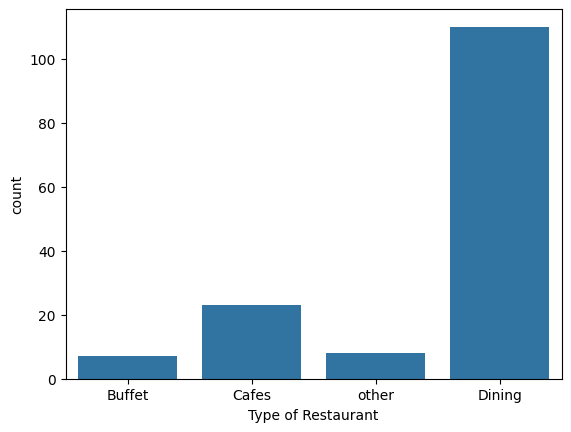

In [14]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")


# ***Conclusion = Majorityof the Restaurants falls in dinning category***

Text(0, 0.5, 'Votes')

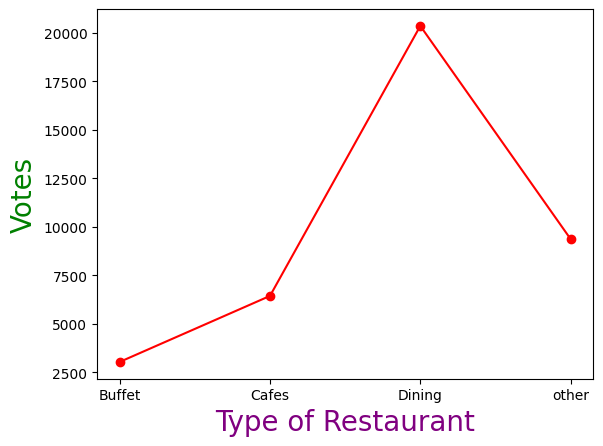

In [20]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='red' , marker="o")
plt.xlabel("Type of Restaurant",c='purple',size=20)
plt.ylabel("Votes",c='green',size=20)

# ***Conlculsion = Dinning Restaurants have maximum votes***

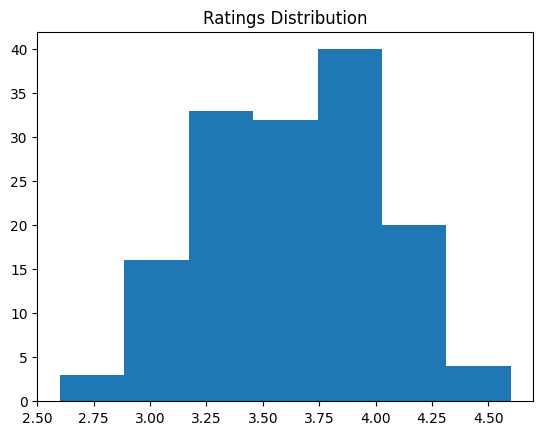

In [21]:
plt.hist(df['rate'],bins=7)
plt.title("Ratings Distribution")
plt.show()

# ***Conclusion = Majority of Restaurants received the ratings from 3.75 to 4.00***

In [22]:
couple_data=df['approx_cost(for two people)']

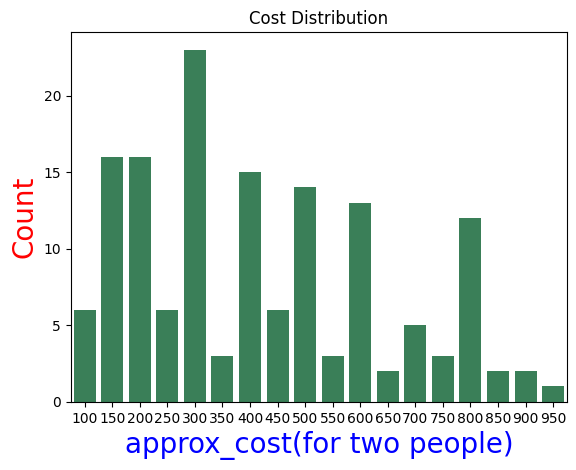

In [50]:
sns.countplot(x="approx_cost(for two people)", data=df, color='seagreen')
plt.title("Cost Distribution")
plt.xlabel("approx_cost(for two people)",c='blue',size=20)
plt.ylabel("Count",c='red',size=20)
plt.show()


# ***Conclusion = Majority of couples prefer restaurants with an approximate cost of 300 rupees***

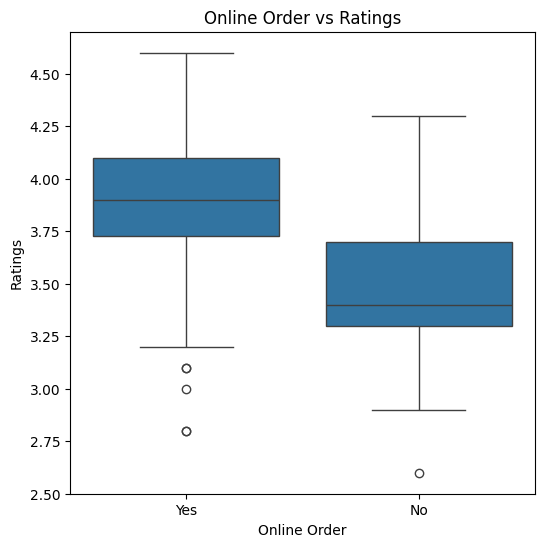

In [54]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)
plt.title("Online Order vs Ratings")
plt.xlabel("Online Order")
plt.ylabel("Ratings")
plt.show()

# ***Conclusion : Offline order received lower ratings compare to online order***

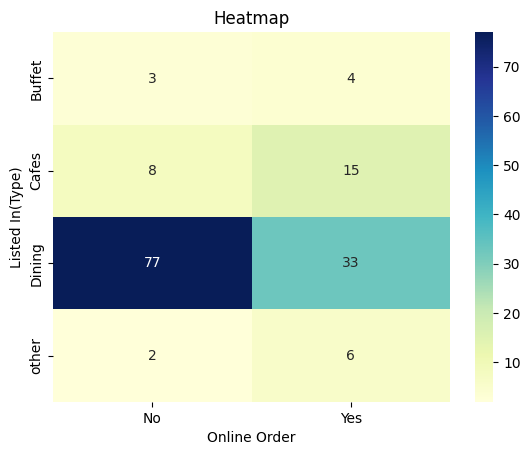

In [55]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True ,cmap='YlGnBu',fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In(Type)")
plt.show()

### **Conclusion : Dinning restaurants primarily accept offline orders , whereas cafes primarily receive online orders .This suggest that clients preferences orders in person at restaurants , but prefer online ordering at cafes. **